In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x, y))

[[255]]


In [3]:
print(x+y)

[4]


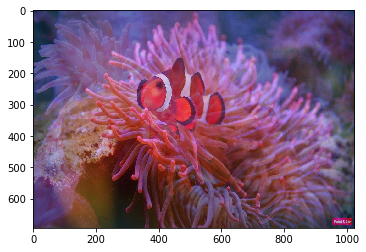

In [4]:
img1 = cv2.imread('anemones.jpg')
img2 = cv2.imread('clown_fish.png')

dst = cv2.addWeighted(img1,0.4,img2,0.6,0)[..., ::-1]

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(dst)

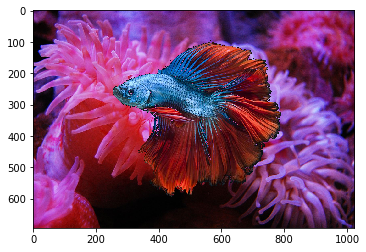

In [6]:
img1 = cv2.imread('anemones.jpg')
img2 = cv2.imread('pimimg.jpg')
img2 = cv2.copyMakeBorder(img2,0,0,165,166,cv2.BORDER_REPLICATE)

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of fish and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# plt.imshow(mask_inv)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)[..., ::-1]
img2[0:rows, 0:1024 ] = dst
plt.imshow(dst)

Simple Thresholding
Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

cv2.THRESH_BINARY
cv2.THRESH_BINARY_INV
cv2.THRESH_TRUNC
cv2.THRESH_TOZERO
cv2.THRESH_TOZERO_INV

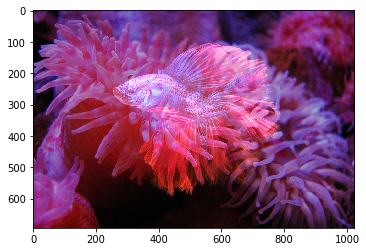

In [12]:
img1 = cv2.imread('anemones.jpg')
img2 = cv2.imread('pimimg.jpg')
img2 = cv2.copyMakeBorder(img2,0,0,165,166,cv2.BORDER_REPLICATE)
dst = cv2.addWeighted(img1,0.8,img2,0.6,0)[..., ::-1]
plt.imshow(dst)